## Import Libraries

In [1]:
from ultralytics import YOLO
from PIL import Image
import os
import numpy as np
import torch
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Predict

In [2]:
model_path = 'runs/detect/train7'
weights_path = model_path + '/weights/best.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

IMG_SIZE = 512

In [72]:
def prep_img(img_path):
    img = Image.open(img_path)
    img = img.convert('RGB')
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img = np.array(img)
    img = img.transpose(2, 0, 1)  # HWC to CHW format
    img = torch.from_numpy(img).float()
    img /= 255.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)
    return img.to(device)

def detect(img_path):
    img = prep_img(img_path)
    model = YOLO(weights_path)
    pred = model(img)
    return pred

def plot_img(img_path, pred):
    img = Image.open(img_path)
    for r in pred:     
        boxes = r.boxes
        for box in boxes:
            b = box.xyxy[0] 
            c = box.cls
            img = cv2.rectangle(np.array(img), (int(b[0]), int(b[1])), (int(b[2]), int(b[3])), (0, 255, 0), 2)
    plt.imshow(img)
    plt.show()
            


0: 640x640 7 normals, 32.1ms
Speed: 0.0ms preprocess, 32.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


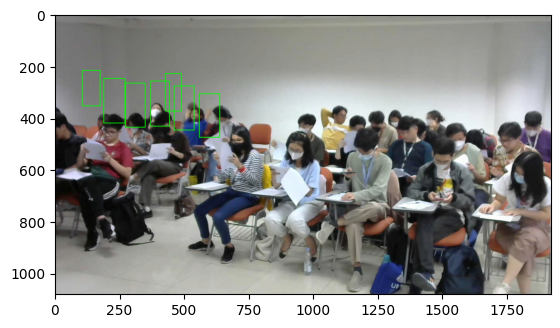

In [74]:
img_path = os.path.abspath('case.jpg')
results = detect(img_path)
plot_img(img_path, results)

In [3]:
model = YOLO(weights_path)

test_images_dir = os.path.join(os.path.abspath('dataset'), 'train/images')

img = []

for img_path in Path(test_images_dir).rglob('*.jpg'):
    prep_img = Image.open(img_path)
    img.append(prep_img)
    # w, h = prep_img.size
    # aspect_ratio = w / h
    # new_h = int(IMG_SIZE / aspect_ratio)
    # new_w = IMG_SIZE

    # prep_img = prep_img.convert('L')
    # prep_img = prep_img.resize((new_w, new_h), Image.Resampling.LANCZOS)
    # new_img = Image.new('RGB', (IMG_SIZE, IMG_SIZE), (255, 255, 255))
    # new_img.paste(prep_img, ((IMG_SIZE - new_w) // 2, (IMG_SIZE - new_h) // 2))
    # img.append(new_img)

results = model(img)

for result in results:
    filename = result.path.split('\\')[-1]
    im_arr = result.plot()
    im = Image.fromarray(im_arr[..., ::-1])
    im.save('output/raw-' + filename)


0: 384x640 13 normals, 6 suspiciouss, 1: 384x640 13 normals, 4 suspiciouss, 2: 384x640 11 normals, 4 suspiciouss, 3: 384x640 12 normals, 4 suspiciouss, 4: 384x640 11 normals, 4 suspiciouss, 5: 384x640 10 normals, 4 suspiciouss, 6: 384x640 13 normals, 5 suspiciouss, 7: 384x640 10 normals, 6 suspiciouss, 8: 384x640 12 normals, 4 suspiciouss, 9: 384x640 13 normals, 6 suspiciouss, 10: 384x640 11 normals, 5 suspiciouss, 11: 384x640 13 normals, 6 suspiciouss, 12: 384x640 11 normals, 5 suspiciouss, 13: 384x640 13 normals, 3 suspiciouss, 14: 384x640 13 normals, 3 suspiciouss, 15: 384x640 13 normals, 3 suspiciouss, 16: 384x640 15 normals, 1 suspicious, 17: 384x640 13 normals, 18: 384x640 14 normals, 19: 384x640 14 normals, 1 suspicious, 20: 384x640 14 normals, 1 suspicious, 21: 384x640 13 normals, 22: 384x640 15 normals, 23: 384x640 14 normals, 24: 384x640 14 normals, 25: 384x640 16 normals, 1 suspicious, 26: 384x640 15 normals, 27: 384x640 15 normals, 28: 384x640 14 normals, 29: 384x640 13 no

## Deploy Model to Roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="TUETWeUqSObQn3mphFix")
project = rf.workspace("adrian-finantyos-team").project("esc-right-camera-angle")

dataset_version = 6
project.version(dataset_version).deploy(model_type="yolov8", model_path=model_path)


loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/adrian-finantyos-team/esc-right-camera-angle/6
Share your model with the world at: https://universe.roboflow.com/adrian-finantyos-team/esc-right-camera-angle/model/6
